In [1]:
import sys
import os
from pathlib import Path

# Add the python directory to the path
python_dir = os.path.join(os.path.dirname(os.getcwd()), 'python')
if python_dir not in sys.path:
    sys.path.append(python_dir)

from nucleus_extractor_manager import (
    NucleusExtractorManager,
    NucleusExtractorConfig,
)

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [2]:
# Available datasets
datasets = {
    # "230212_stack6": "/mnt/ceph/users/lbrown/MouseData/Rebecca/230212_stack6/",
    "220321_stack11": "/mnt/ceph/users/lbrown/MouseData/Eszter1",
    # "221016_FUCCI_Nanog_stack_3": "/mnt/ceph/users/lbrown/Labels3DMouse/Abhishek/RebeccaData/221016_FUCCI_Nanog_stack_3/",
}

# Configuration
config = NucleusExtractorConfig()
config.time_window = 1

In [3]:
# Initialize manager
data_path = datasets["220321_stack11"]
manager = NucleusExtractorManager(data_path, config) # dead and mitotic events

print("🎯 Nucleus Extractor Manager initialized")
print(f"📂 Dataset: {data_path}")
print(f"⚙️ Config: {config}")
print(f"📁 Using new data structure: data/nuclei_state_dataset/{{event_type}}/")

📂 Loading metadata from /mnt/ceph/users/lbrown/MouseData/Eszter1
📂 Loading classification data from: /mnt/ceph/users/lbrown/MouseData/Eszter1/DeathAndMitoticClass.txt
✅ Loaded 73 classifications
Columns: ['frame', 'nucleus_id', 'mitotic', 'death']

Data distribution:
Frames: 2 - 187
Nucleus IDs: 49 unique
Mitotic events: 62
Death events: 11
✅ Loaded 73 classifications
🎯 Nucleus Extractor Manager initialized
📂 Dataset: /mnt/ceph/users/lbrown/MouseData/Eszter1
⚙️ Config: NucleusExtractorConfig(crop_padding=2, time_window=1, frame_offsets=None, min_object_size=20)
📁 Using new data structure: data/nuclei_state_dataset/{event_type}/


In [4]:
# Reload the module to get the latest version
import importlib
import nucleus_extractor_manager
importlib.reload(nucleus_extractor_manager)
# Loop through all datasets with proper logging indicators
for dataset_name, dataset_path in datasets.items():
    print(f"\n🔄 Processing dataset: {dataset_name}")
    try:
        # Re-initialize manager for each dataset
        manager = nucleus_extractor_manager.NucleusExtractorManager(dataset_path, config)
        print(f"✅ Manager initialized for {dataset_name}")

        # Extract a small batch for demonstration
        if manager.metadata:
            print(f"🔬 Extracting sample nuclei for {dataset_name}...")
            results = manager.batch_extract_nuclei(dataset_name=dataset_name)

            if results:
                print(f"💾 Saving results for {dataset_name}...")
            else:
                print(f"❌ No results to save for {dataset_name}")
        else:
            print(f"❌ No metadata loaded for {dataset_name}")
    except Exception as e:
        print(f"⚠️ Error processing {dataset_name}: {e}")

print("\n✅ All datasets processed!")



🔄 Processing dataset: 220321_stack11
📂 Loading metadata from /mnt/ceph/users/lbrown/MouseData/Eszter1
📂 Loading classification data from: /mnt/ceph/users/lbrown/MouseData/Eszter1/DeathAndMitoticClass.txt
✅ Loaded 73 classifications
Columns: ['frame', 'nucleus_id', 'mitotic', 'death']

Data distribution:
Frames: 2 - 187
Nucleus IDs: 49 unique
Mitotic events: 62
Death events: 11
✅ Loaded 73 classifications
✅ Manager initialized for 220321_stack11
🔬 Extracting sample nuclei for 220321_stack11...
🚀 Starting batch extraction of 73 nuclei...

[1/73] Processing nucleus 3 (frame 2) - mitotic
🔍 Extracting nucleus 3 from frames [1, 2, 3]
❌ Nucleus 3 not found in event frame 2
  ❌ Failed extraction

[2/73] Processing nucleus 4 (frame 4) - mitotic
🔍 Extracting nucleus 4 from frames [3, 4, 5]
❌ Nucleus 4 not found in event frame 4
  ❌ Failed extraction

[3/73] Processing nucleus 17 (frame 44) - mitotic
🔍 Extracting nucleus 17 from frames [43, 44, 45]
📦 Bounding box: Z[0:5], Y[138:166], X[220:248]


📊 Plotting comprehensive results for nucleus 16 (frame 25) - mitotic
📊 Plotting comprehensive results for nucleus 16 (frame 25) - mitotic


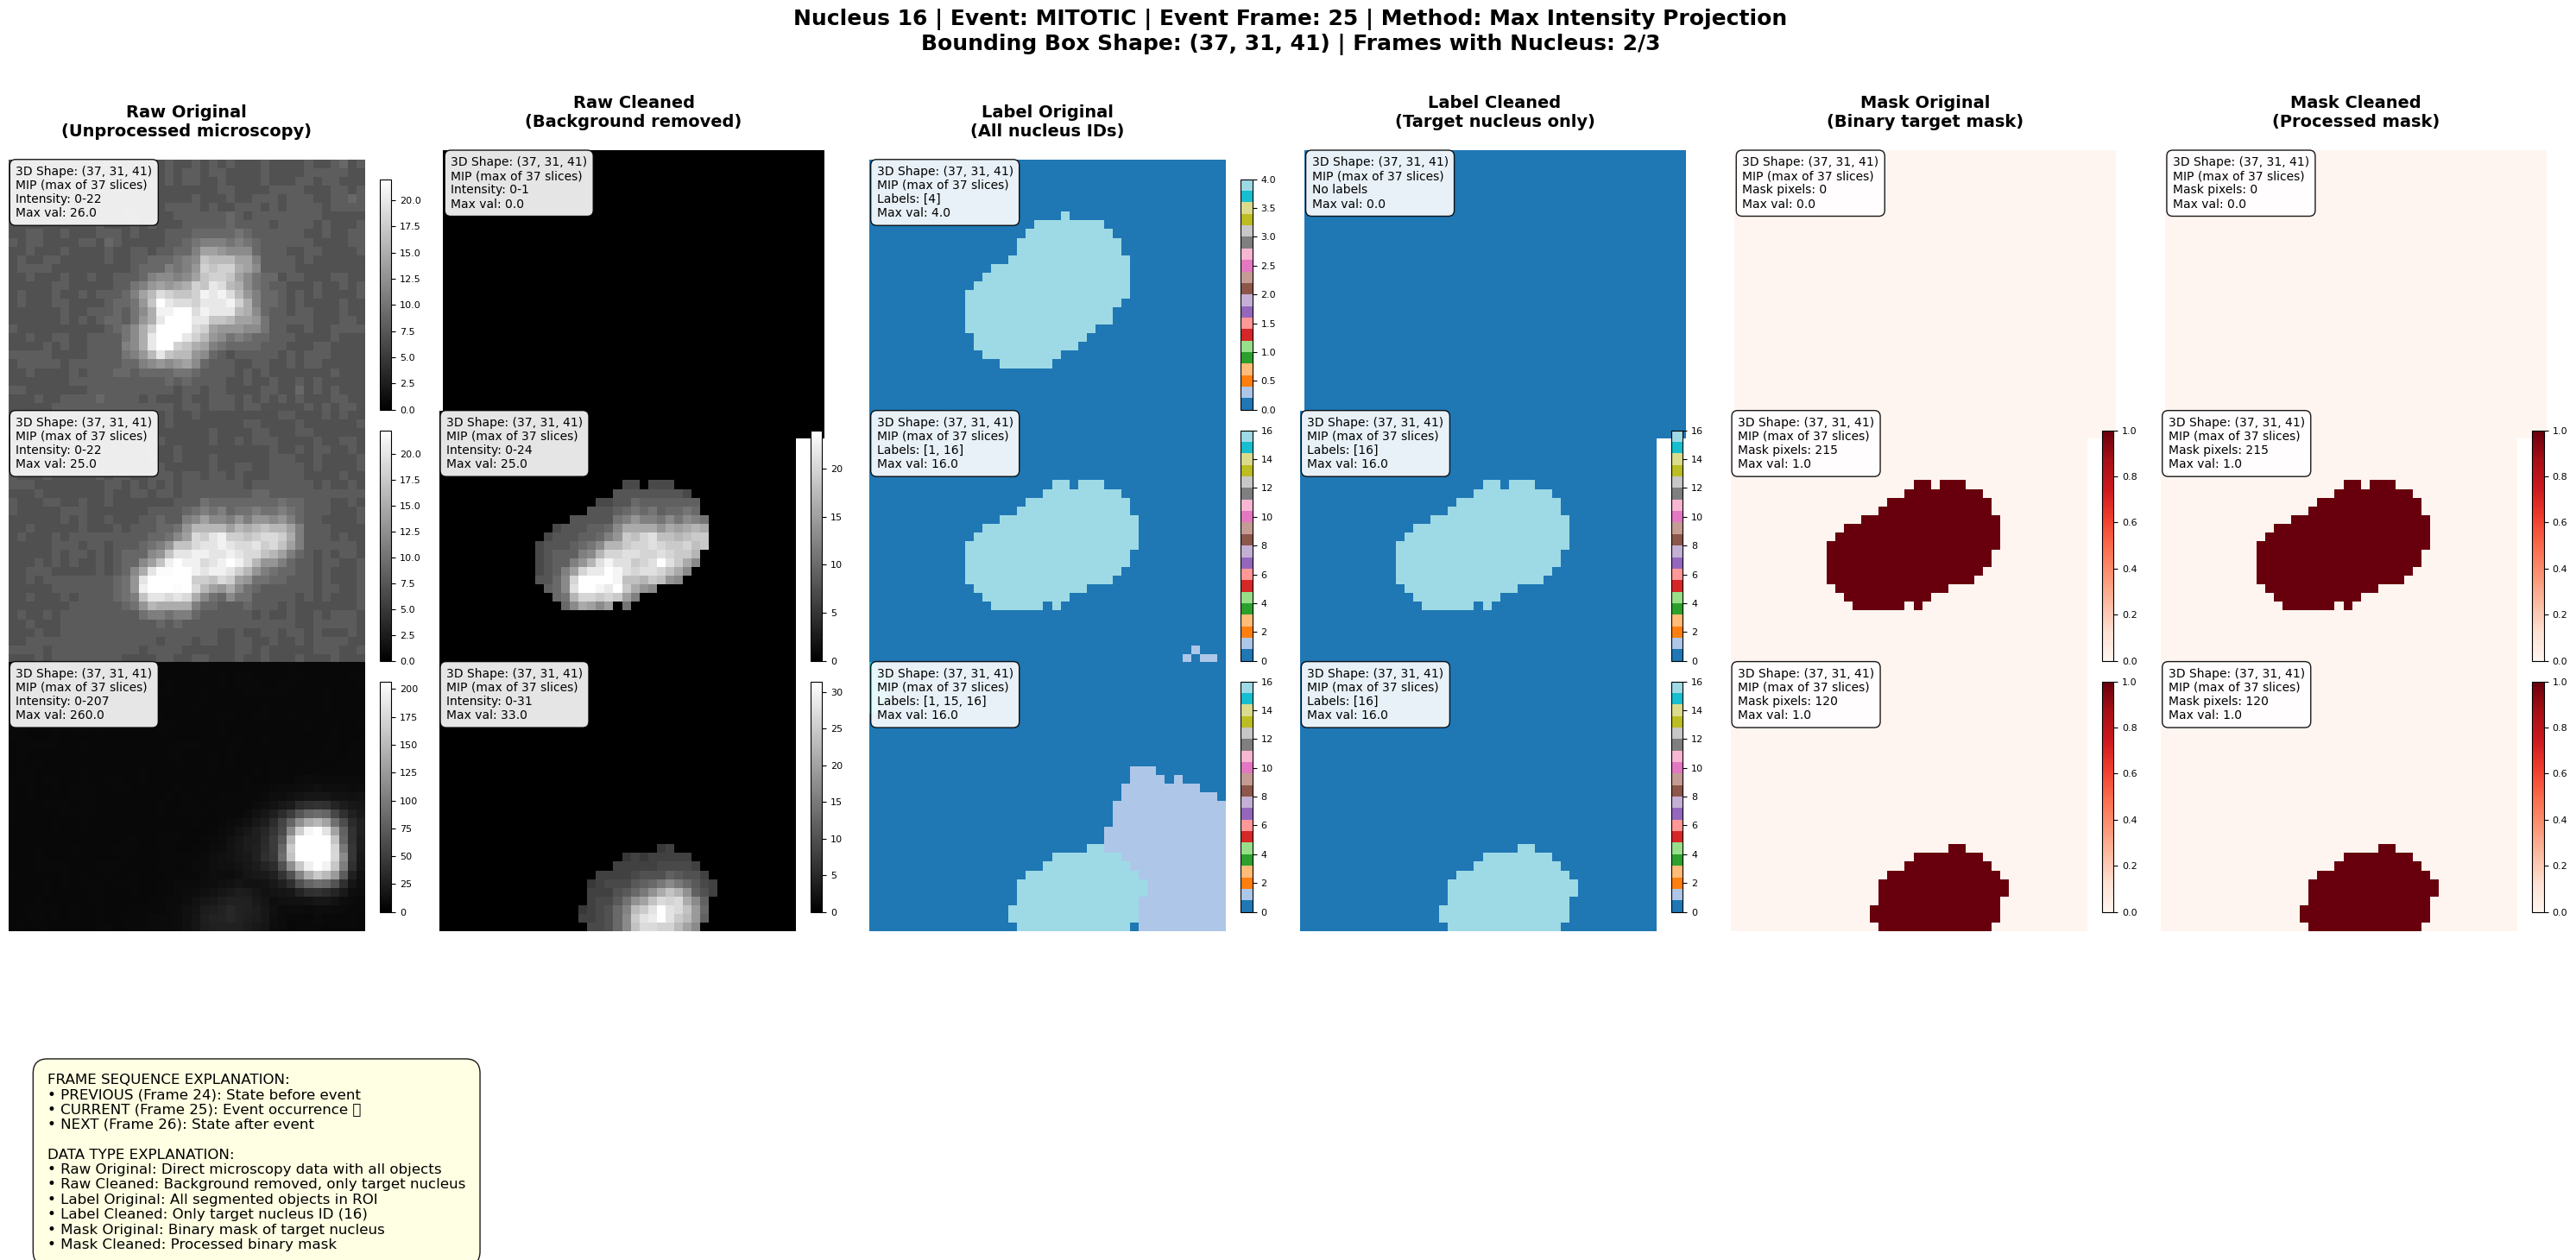

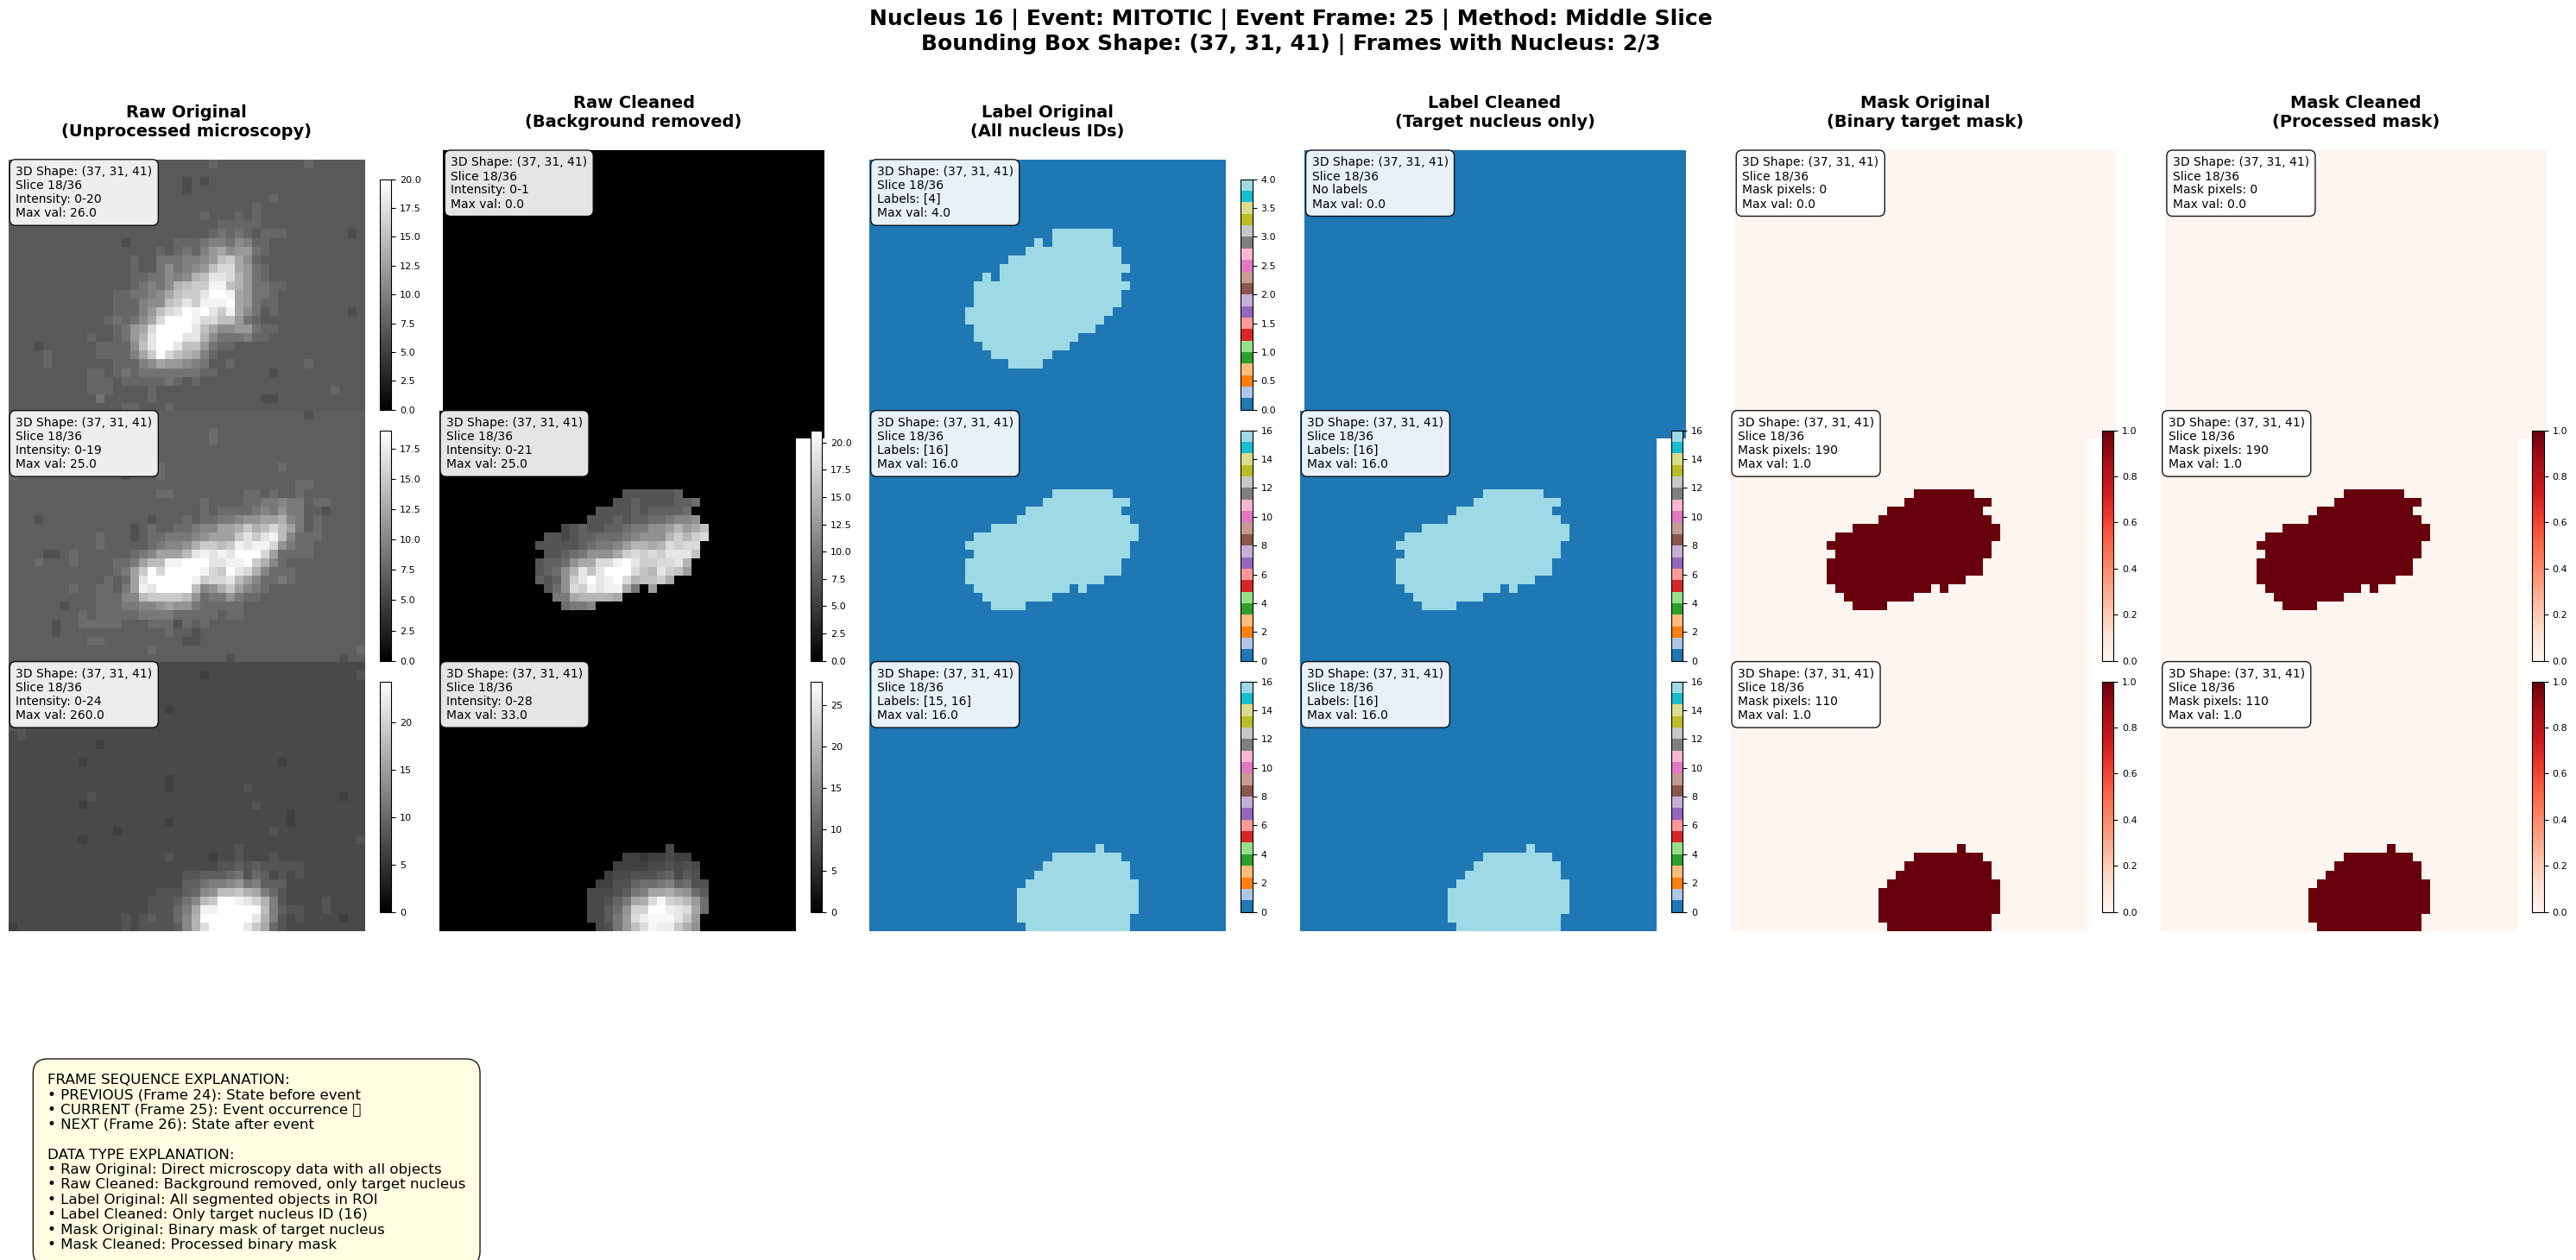

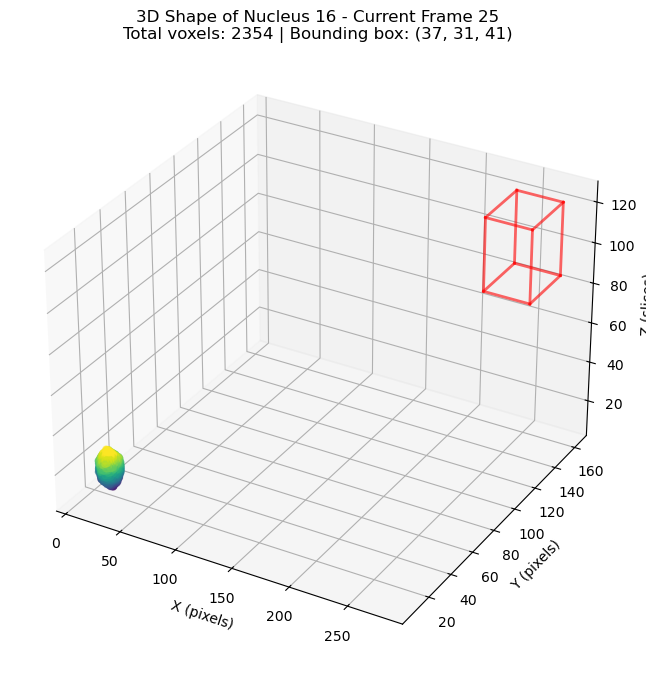

In [ ]:
# Test the improved plotting function
fig1 = manager.plot_result(results[0], plot_type="comprehensive")
fig2 = manager.plot_result(results[0], plot_type="middle_slice")
fig3 = manager.plot_nucleus_3d_shape(results[0], frame_type="current")